In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
print("done")

done


In [2]:
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]

In [3]:
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]
center = [[-2, 2], [2, -2]]
color_map=np.array(['b','r'])
def assignet_member (x1,x2,center):
    c1=np.sqrt(np.square(np.array(x1)-center[0][0])+np.square(np.array(x2)-center[0][1]))
    c2=np.sqrt(np.square(np.array(x1)-center[1][0])+np.square(np.array(x2)-center[1][1]))
    point=c1>c2
    color=color_map[point+1-1]
    return color,point

point=assignet_member(x1,x2,center)
points=point[1]


print("plot points are :",assignet_member(x1,x2,center))

plot points are : (array(['b', 'r', 'r', 'b', 'b', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b',
       'r', 'b', 'b', 'b'], dtype='<U1'), array([False,  True,  True, False, False,  True,  True, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
       False, False, False]))


In [4]:
def update_center(x1,x2,points):
    center1=[np.mean(np.array(x1)[~points]),np.mean(np.array(x2)[~points])]
    center2=[np.mean(np.array(x1)[points]),np.mean(np.array(x2)[points])]
    return center1,center2
print("the:",update_center(x1,x2,points))

the: ([-1.1235294117647057, 0.47941176470588237], [1.3346153846153848, -0.45384615384615373])


In [5]:
def plot_point(centroid=None,colors='y',fig_title=None):
    fig=plt.figure(figsize=(15,10))
    ax=fig.add_subplot(1,1,1)
    cetroid_color=['bx','rx']
    if centroid:
        for (i, centroid) in enumerate(centroid):
            ax.plot(centroid[0],centroid[1],cetroid_color[i],markeredgewidth=5,markersize=20)
    plt.scatter(x1,x2,s=500,c=colors)
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)
    
    #for setting the plot styling
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    ax.set_title(fig_title, fontsize=24)
    plt.show()


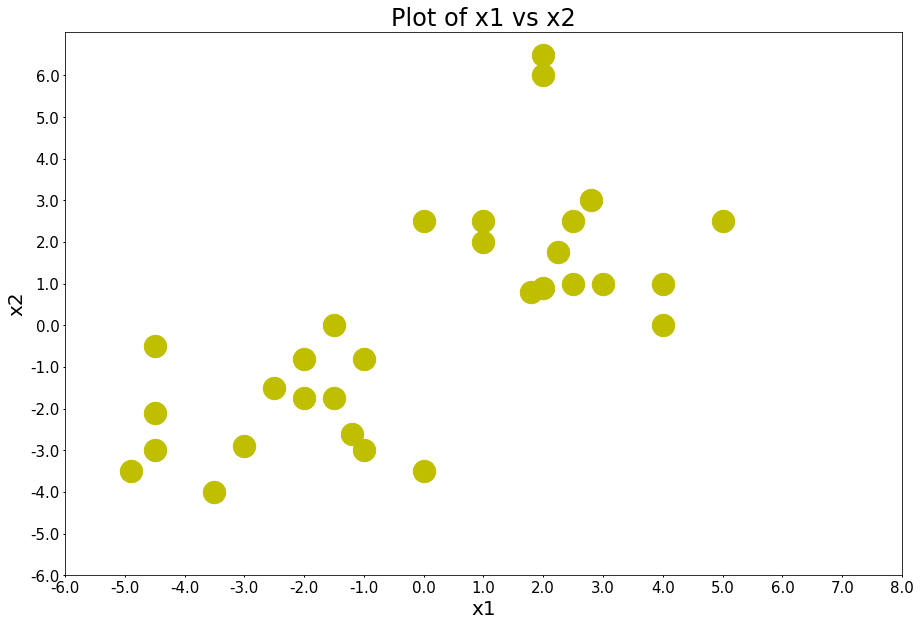

In [6]:
plot_point(fig_title='Plot of x1 vs x2')

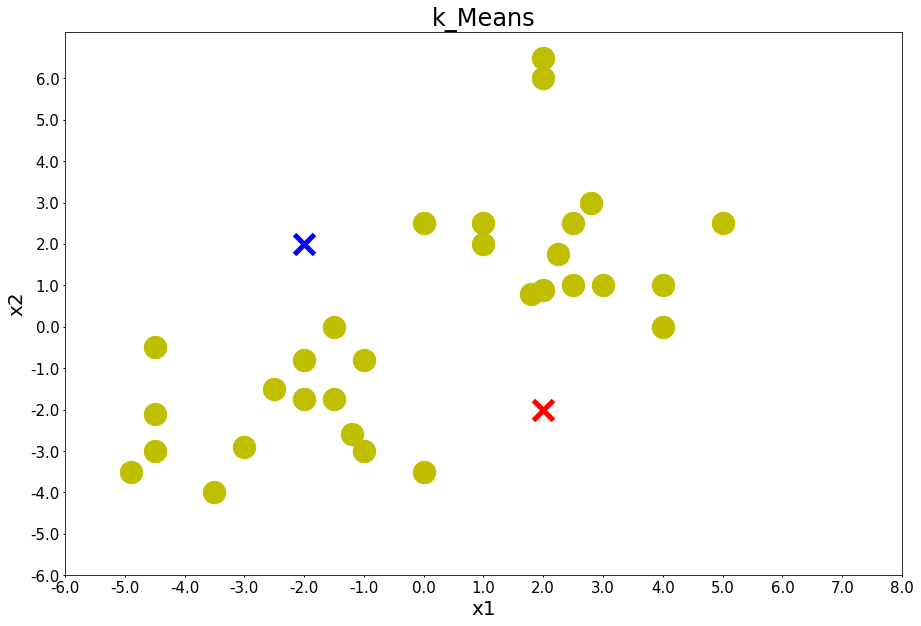

In [7]:
center = [[-2, 2], [2, -2]]
plot_point(center,fig_title='k_Means')

Iteration 1 - Press Enter to update the member of clusters


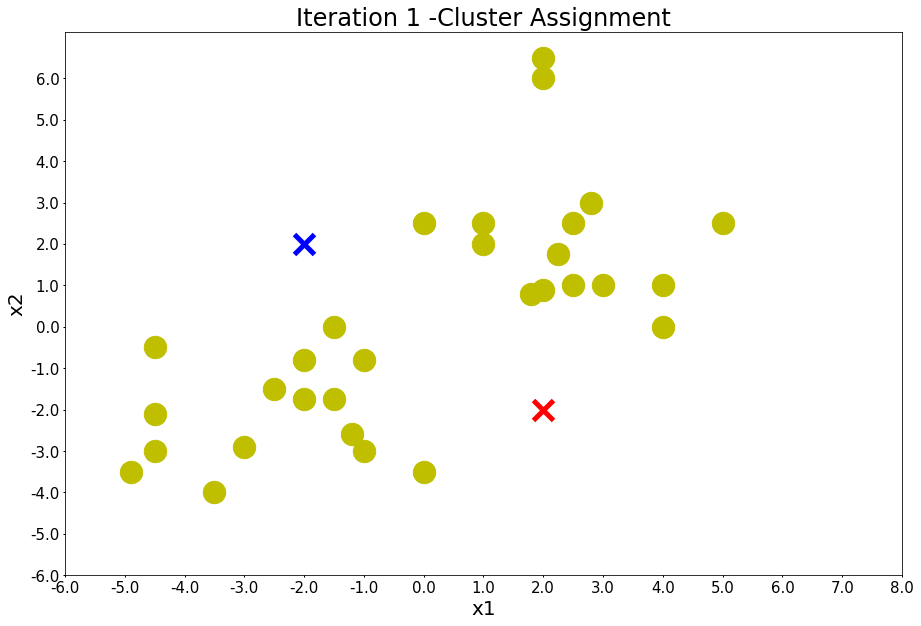

Iteration 1- Press enter to update the centroid


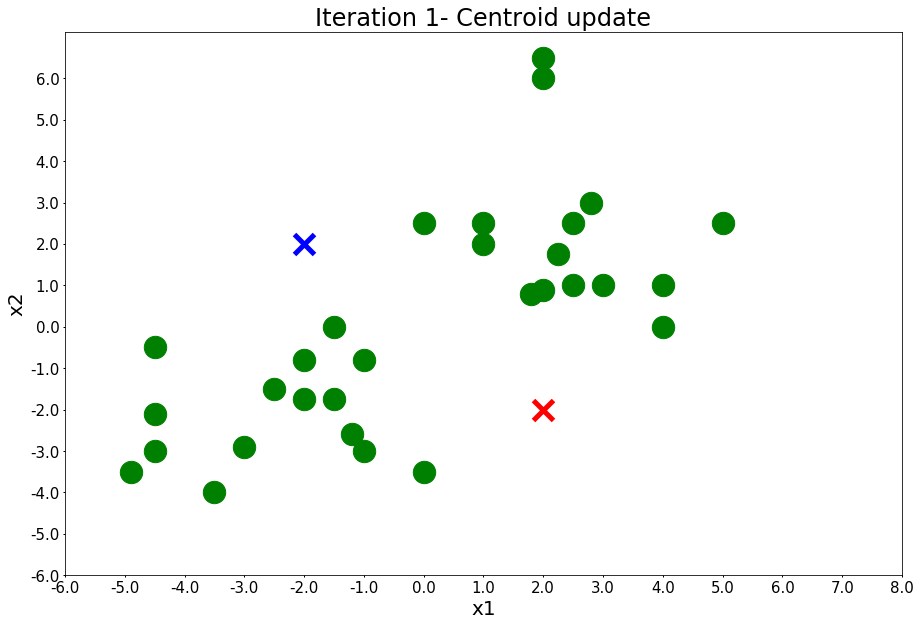

Iteration 2 - Press Enter to update the member of clusters


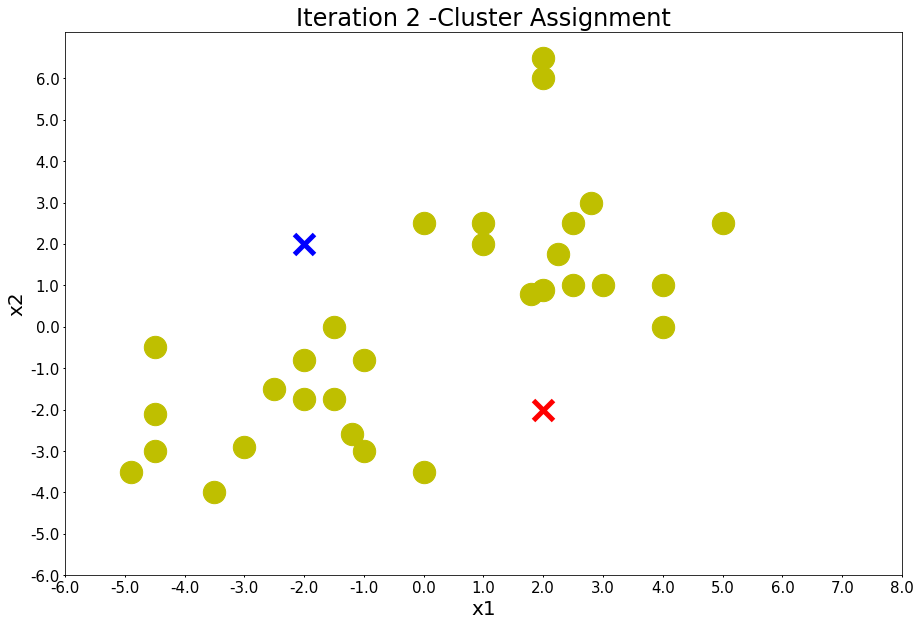

Iteration 2- Press enter to update the centroid


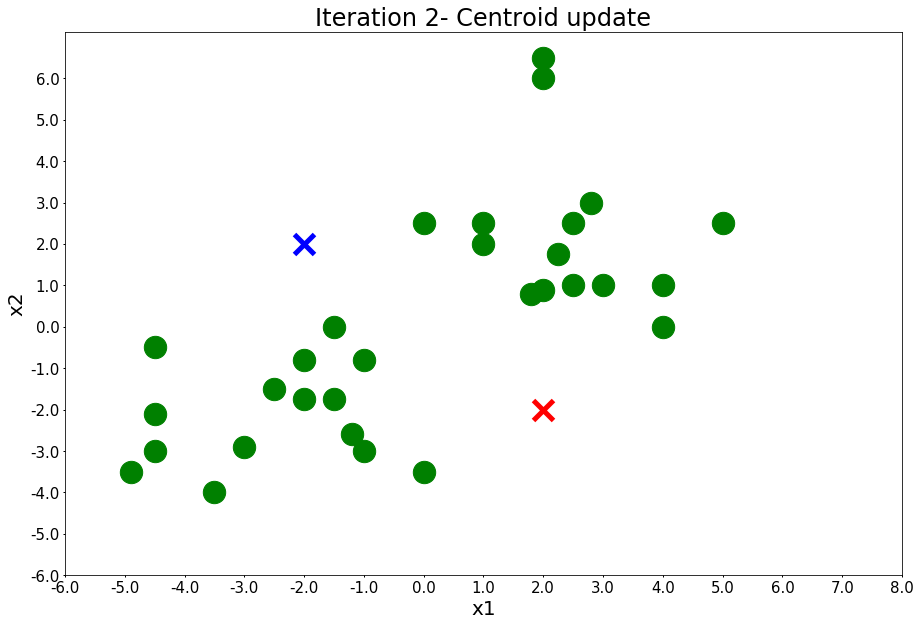

In [8]:
no_iteration=1
for i in range(no_iteration):
    input('Iteration {} - Press Enter to update the member of clusters'.format(i+1))
    point=assignet_member(x1,x2,center)
    title='Iteration {} -Cluster Assignment'.format(i+1)
    plot_point(center,colors='y',fig_title=title)
    input ('Iteration {}- Press enter to update the centroid'.format(i+1))
    centers=update_center(x1,x2,points)
    title='Iteration {}- Centroid update'.format(i+1)
    plot_point(center, colors='g', fig_title=title)
    

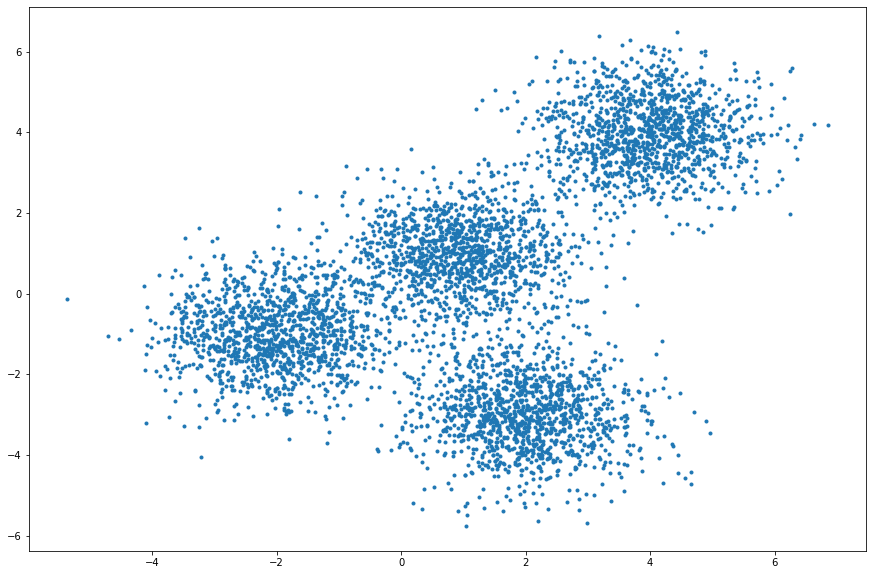

In [9]:
np.random.seed(0)
X,y=make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]],cluster_std=0.9)
plt.figure(figsize=(15,10))
plt.scatter(X[:,0],X[:,1],marker='.')

In [10]:
k_means=KMeans(init="k-means++",n_clusters=4,n_init=12)

In [11]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
k_means_labels=k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

In [13]:
k_means_cluster=k_means.cluster_centers_
k_means_cluster

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

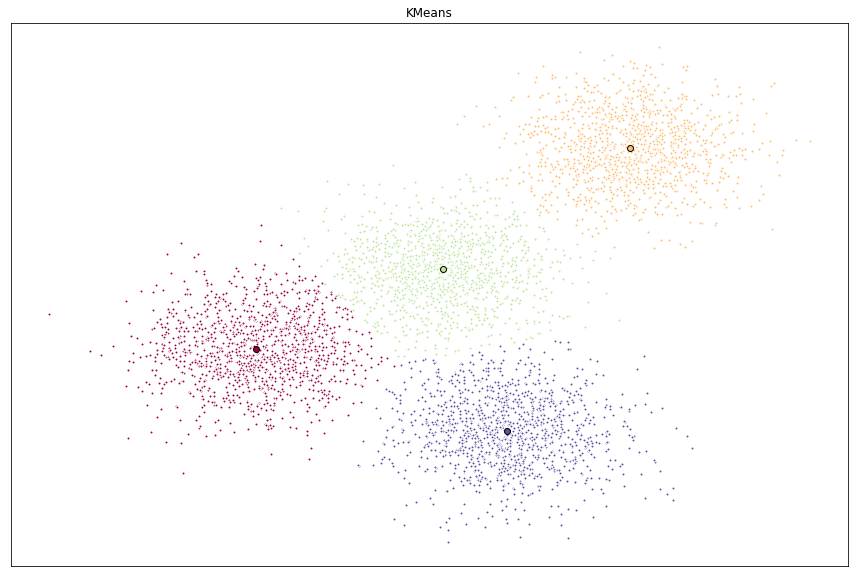

In [15]:
#for visualizing the data
fig = plt.figure(figsize=(15, 10))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))


ax = fig.add_subplot(1, 1, 1)


for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):


    my_members = (k_means_labels == k)
    

    cluster_center = k_means_cluster[k]
 
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    

    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)


ax.set_title('KMeans')


ax.set_xticks(())


ax.set_yticks(())


plt.show()